In [ ]:
Predictive Analytics and Fraud Detection in Insurance Claims

Load Data Set by using Kaggle API

In [275]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set the environment variable to the directory containing kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = r"C:\Users\reshm\Documents"

def download_insurance_claims_dataset():
    # Create an instance of the Kaggle API
    api = KaggleApi()
    api.authenticate()

    # Define the dataset to download
    dataset = 'buntyshah/auto-insurance-claims-data'
    
    # Download the dataset
    api.dataset_download_files(dataset, path='.', unzip=True)
    print("Download complete.")

# Call the function to download the dataset
download_insurance_claims_dataset()



Dataset URL: https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data
Download complete.


In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
import xgboost as xgb
import plotly.graph_objects as go

from IPython.display import display 
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier


In [278]:

# Load the dataset
data = pd.read_csv(r'C:\Users\reshm\Documents\Final project\insurance_claims.csv')


In [279]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [280]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [281]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Data Pre-Processing Handling Missing values 

In [282]:
# Remove the '_c39' column from the DataFrame
data = data.drop(columns=['_c39'])

# Verify the column was removed
print(data.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


In [283]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Replace specific columns with 0
columns_to_replace_with_zero = ['collision_type', 'property_damage', 'police_report_available', 'authorities_contacted']
data[columns_to_replace_with_zero] = data[columns_to_replace_with_zero].fillna(0)

# Drop specified columns
columns_to_drop = ['policy_number', 'policy_bind_date', 'policy_state', 
                   'insured_zip', 'incident_location', 'incident_date', 'incident_state', 
                   'incident_city', 'insured_hobbies', 'auto_make', 'auto_model', 'auto_year']

data.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the modified dataset
data.head()



,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,0,0,0,0,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,0,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


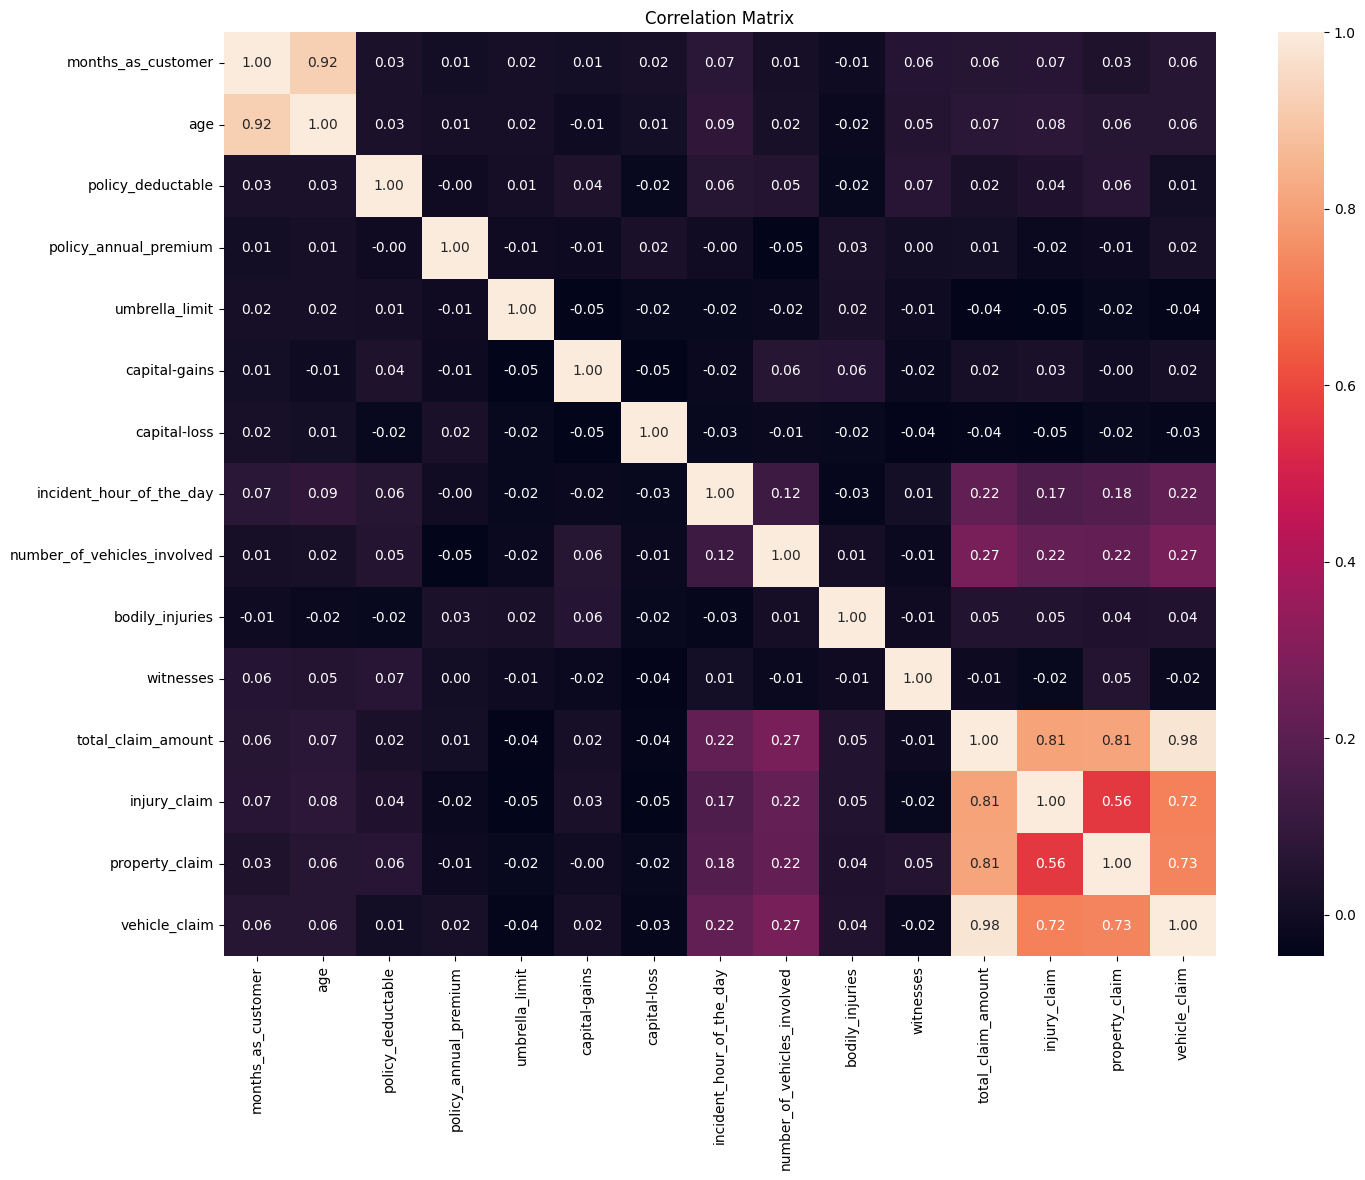

In [284]:
# Explore initial relationships using correlation
plt.figure(figsize = (16, 12))
numeric_data = data.select_dtypes(include=[np.number])

# Check if there are any numeric columns
if not numeric_data.empty:
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric columns found for correlation analysis.")

In [285]:
from IPython.display import display

# List of columns to drop
columns_to_drop = [
    'policy_number', 'policy_deductable', 'policy_state', 'insured_zip', 
    'incident_location', 'incident_date', 'incident_state', 'incident_city', 
    'insured_hobbies', 'auto_make', 'auto_model', 'auto_year', 
    'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'property_damage', 
    'bodily_injuries', 'witnesses', 'insured_relationship', 'policy_csl', 'months_as_customer', 'total_claim_amount', 'number_of_vehicles_involved', 'police_report_available'
 ]


# Check for columns that exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]

# Drop only the columns that exist in the DataFrame
data.drop(columns=existing_columns_to_drop, inplace=True)

# Display the first few rows of the modified dataset
display(data.head())


,age,insured_sex,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,injury_claim,property_claim,vehicle_claim,fraud_reported
0,48,MALE,MD,craft-repair,Single Vehicle Collision,Side Collision,Major Damage,Police,5,6510,13020,52080,Y
1,42,MALE,MD,machine-op-inspct,Vehicle Theft,0,Minor Damage,Police,8,780,780,3510,Y
2,29,FEMALE,PhD,sales,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,7700,3850,23100,N
3,41,FEMALE,PhD,armed-forces,Single Vehicle Collision,Front Collision,Major Damage,Police,5,6340,6340,50720,Y
4,44,MALE,Associate,sales,Vehicle Theft,0,Minor Damage,0,20,1300,650,4550,N


In [287]:
# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

# Display the results
display("Categorical Columns:", categorical_cols)
display("Numerical Columns:", numerical_cols)


'Categorical Columns:'

['insured_sex',
 'insured_education_level',
 'insured_occupation',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'fraud_reported']

'Numerical Columns:'

['age',
 'incident_hour_of_the_day',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [288]:
# Save the cleaned data into a new DataFrame
cleaned_data = data.copy()


In [289]:
# Save the cleaned data to a CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)


 Variance Inflation Factor (VIF) 

Variance Inflation Factor (VIF): The VIF function is used to measure collinearity between the features in a regression model.
Interpreting VIF:
VIF = 1: No multicollinearity.
1 < VIF < 5: Moderate multicollinearity.
VIF > 5: High multicollinearity, consider removing the feature.


In [254]:
# Import necessary libraries
import numpy as np
import pandas as pd
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your dataset, select only the numerical features
data_numerical = data.select_dtypes(include=[np.number])

# Function to calculate VIF
def calculate_vif(cleaned_data):
    # Add a constant column for intercept
    df_with_const = add_constant(cleaned_data)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df_with_const.columns
    vif_data['VIF'] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]
    
    return vif_data

# Calculate VIF for the numerical features
vif_result = calculate_vif(data_numerical)

# Exclude the constant (first row) from the results
vif_result_filtered = vif_result[vif_result['Feature'] != 'const']

# Display the VIF results
print("VIF Results for Features (Excluding Constant):")
display(vif_result_filtered)

# Optionally, filter out features with high VIF (e.g., VIF > 5)
vif_df_reduced = vif_result_filtered[vif_result_filtered['VIF'] <= 5]

# Display the reduced VIF results
print("Filtered VIF Results (VIF <= 5):")
display(vif_df_reduced)


VIF Results for Features (Excluding Constant):


,Feature,VIF
1,age,1.011848
2,incident_hour_of_the_day,1.055892
3,injury_claim,2.109855
4,property_claim,2.169482
5,vehicle_claim,3.125742


Filtered VIF Results (VIF <= 5):


,Feature,VIF
1,age,1.011848
2,incident_hour_of_the_day,1.055892
3,injury_claim,2.109855
4,property_claim,2.169482
5,vehicle_claim,3.125742


,age,incident_hour_of_the_day,injury_claim,property_claim,vehicle_claim
age,1.000000,0.087161,0.075522,0.060898,0.062588
incident_hour_of_the_day,0.087161,1.000000,0.165768,0.179536,0.215626
injury_claim,0.075522,0.165768,1.000000,0.563866,0.722878
property_claim,0.060898,0.179536,0.563866,1.000000,0.732090
vehicle_claim,0.062588,0.215626,0.722878,0.732090,1.000000


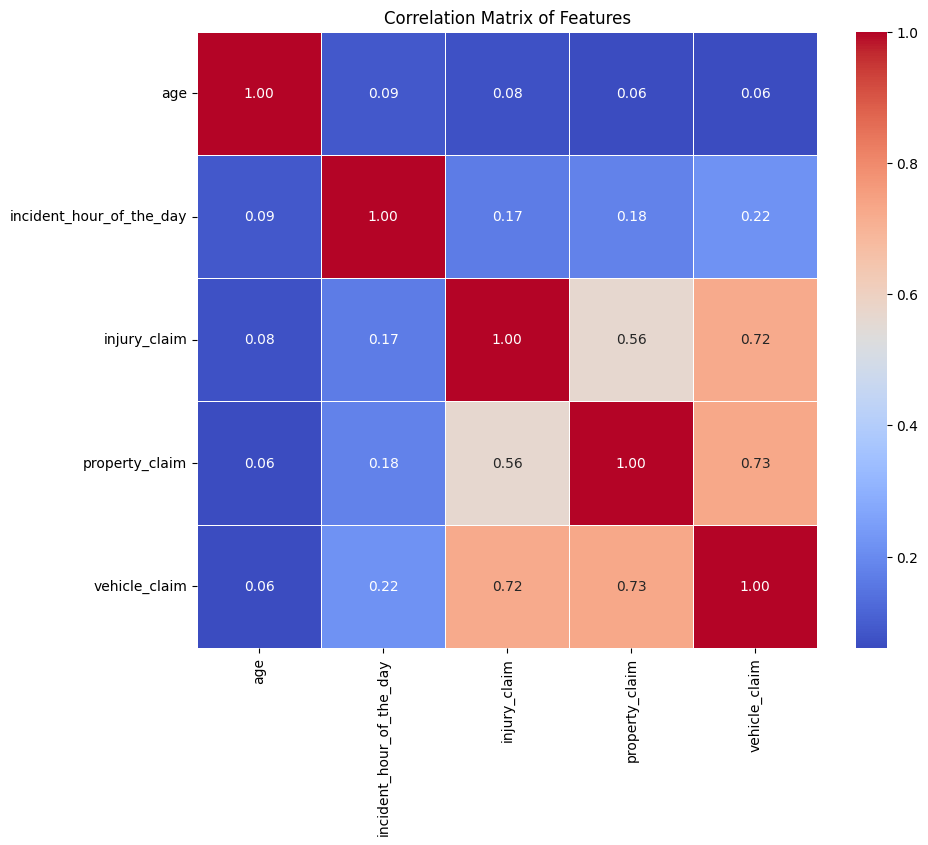

In [290]:
# Select only the numerical columns
cleaned_data_numerical = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = cleaned_data_numerical.corr()

# Display the correlation matrix using IPython display
display(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


Count the number of fraud and non-fraud cases

In [291]:

# Count all unique values in the 'fraud_reported' column
fraud_counts = data['fraud_reported'].value_counts()
print(fraud_counts)




fraud_reported
N    753
Y    247
Name: count, dtype: int64


PLOTTING THE DISTRIBUTION IN THE NUMERICAL FREATURE

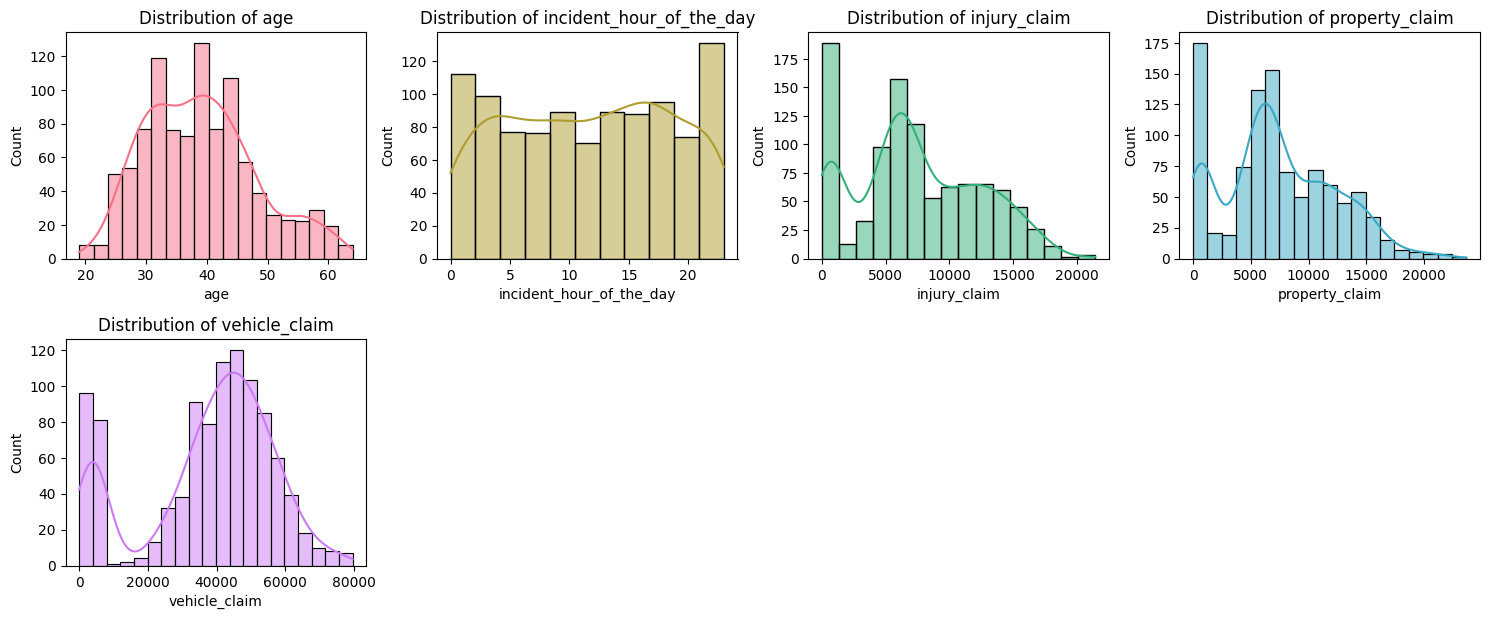

In [292]:
# Filter only the numeric columns from the cleaned data
num_data = cleaned_data.select_dtypes(include=['number'])

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

colors = sns.color_palette("husl", len(num_data.columns))  # Color palette based on number of numeric columns

for i, (col, color) in enumerate(zip(num_data.columns, colors), 1):
    plt.subplot(4, 4, i)  # Adjust the subplot grid as needed
    sns.histplot(num_data[col], kde=True, color=color)  # Assign a vibrant color to each plot
    plt.title(f'Distribution of {col}', fontsize=12)

plt.tight_layout()
plt.show()


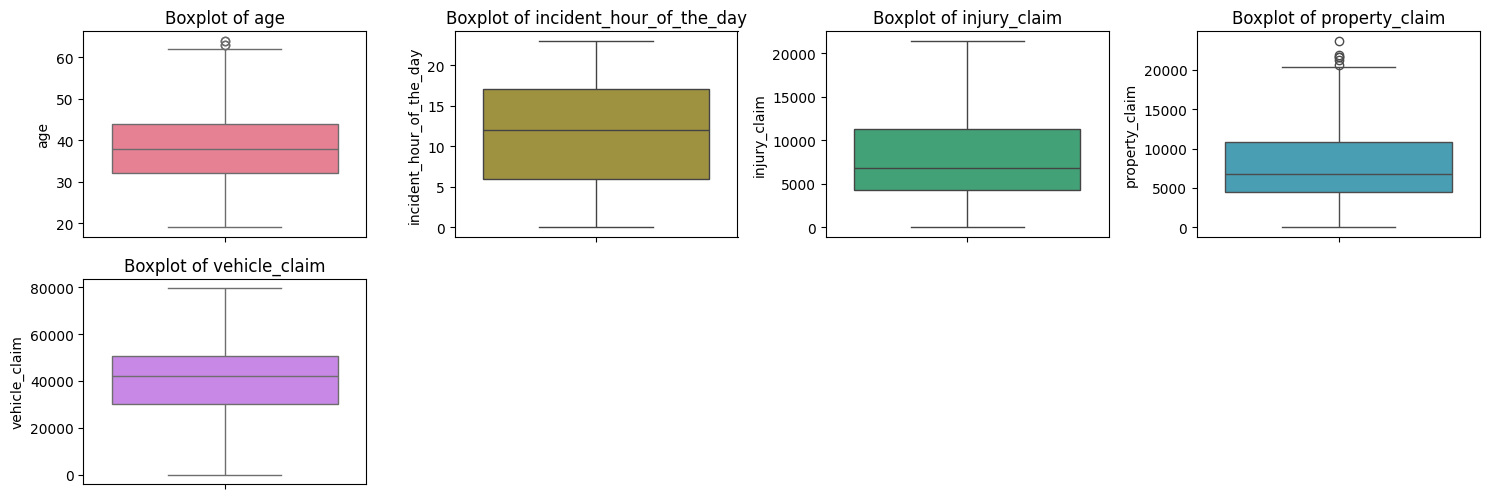

In [293]:

colors = sns.color_palette("husl", len(num_data.columns))  # "husl" is a high-saturation color palette

# Plot boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, (col, color) in enumerate(zip(num_data.columns, colors), 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=num_data[col], color=color)  # Assign vibrant color to each boxplot
    plt.title(f'Boxplot of {col}', fontsize=12)

plt.tight_layout()
plt.show()


REMOVING AND HANDLING OUTLIERS

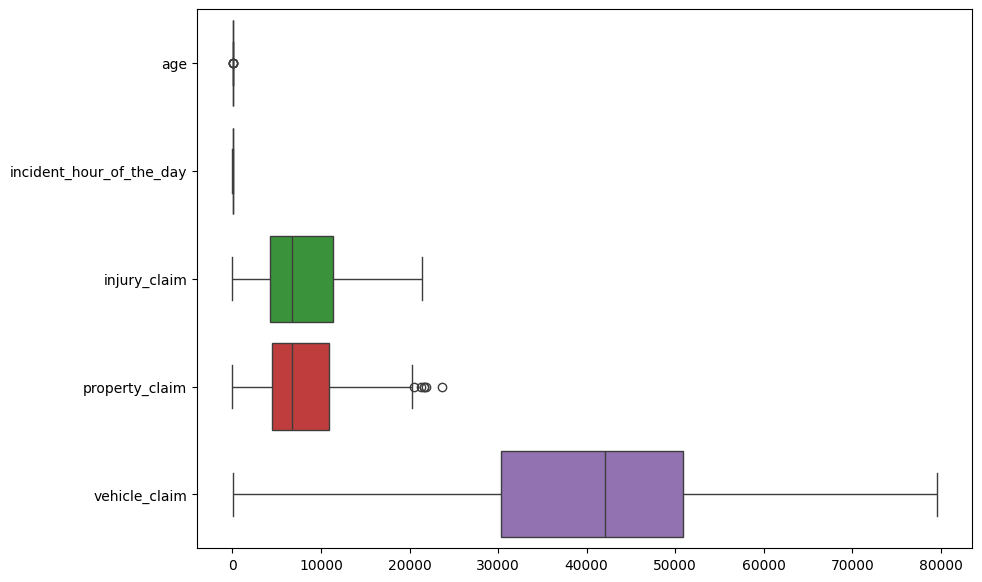

In [294]:

# Initialize Isolation Forest with a contamination level (proportion of outliers)
iso = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers (-1 for outliers, 1 for inliers)
outliers = iso.fit_predict(num_data)

# Filter out rows classified as outliers
num_data_no_outliers = num_data[outliers == 1]

# Example: Boxplot for each numerical column to visualize outliers
plt.figure(figsize=(10, 7
                    ))
sns.boxplot(data=num_data, orient='h')
plt.show()



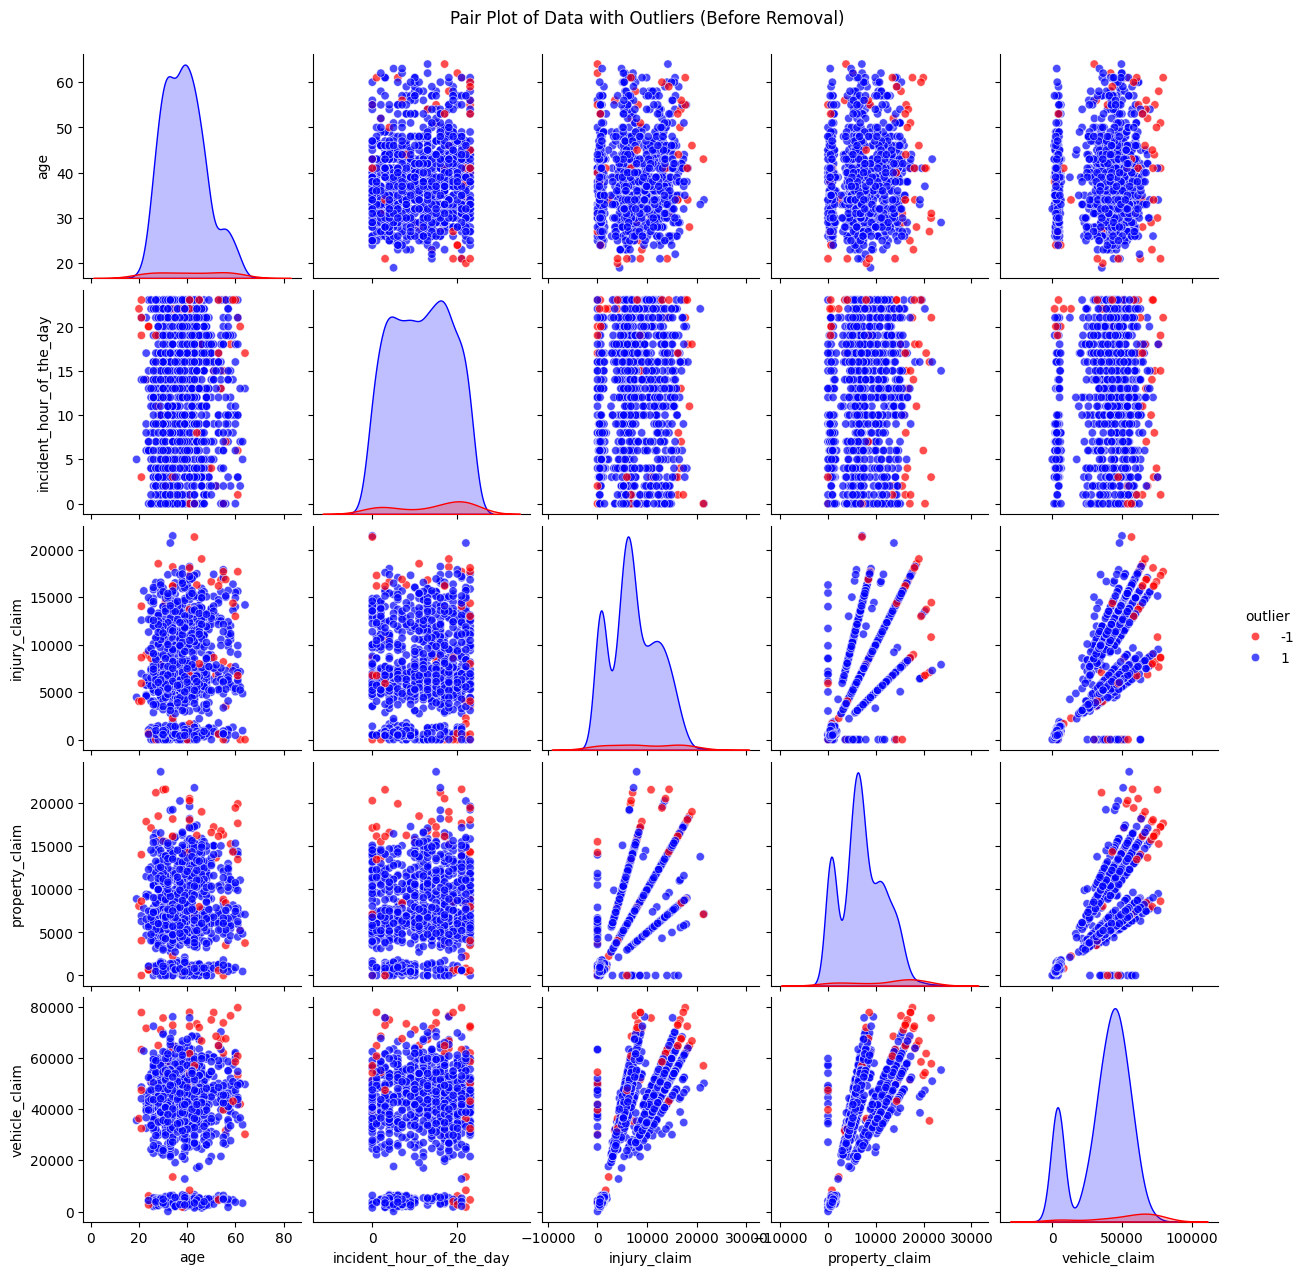

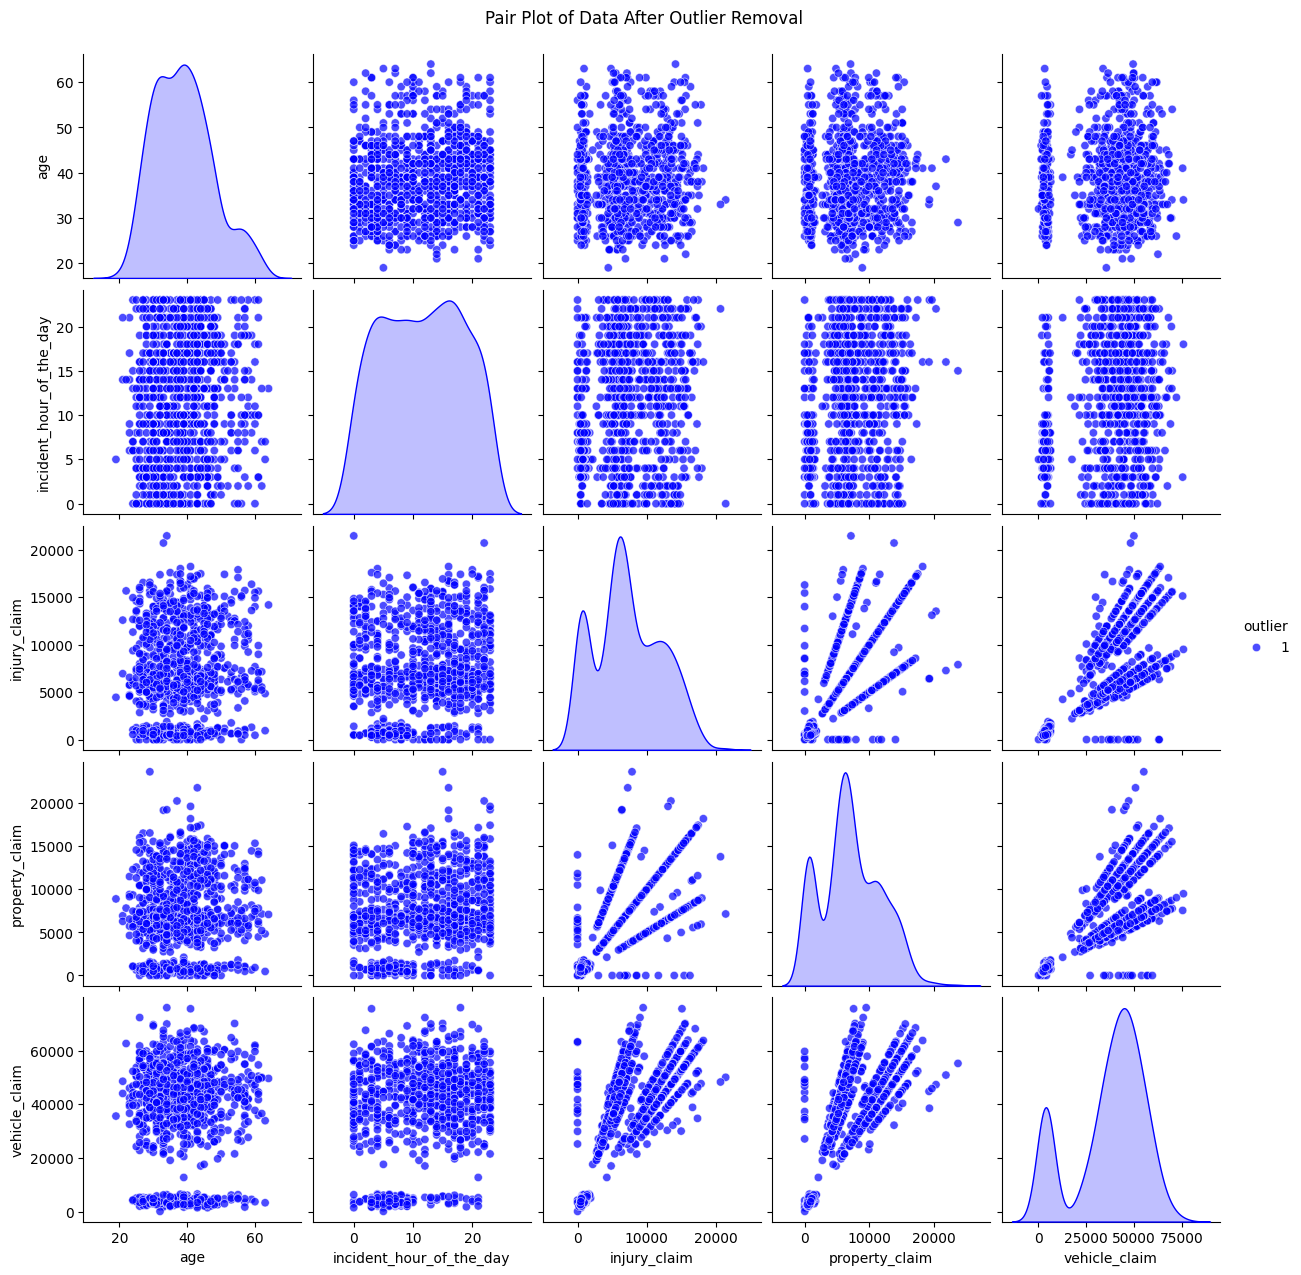

In [295]:

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination level as needed

# Fit the model and predict the outliers
outlier_pred = iso_forest.fit_predict(num_data)

# Outliers are labeled as -1, and inliers are labeled as 1
num_data['outlier'] = outlier_pred

# Pair plot before outlier removal
sns.pairplot(num_data, hue='outlier', palette={1: 'blue', -1: 'red'}, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Data with Outliers (Before Removal)', y=1.02)
plt.show()

# Remove outliers
num_data_no_outliers = num_data[num_data['outlier'] == 1]

# Pair plot after outlier removal
sns.pairplot(num_data_no_outliers, hue='outlier', palette={1: 'blue'}, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Data After Outlier Removal', y=1.02)
plt.show()



Encoding categorical columns is an essential step in preparing data for machine learning models.

In [296]:

# Load the dataset 
data = pd.read_csv(r'C:\Users\reshm\Documents\Final project\cleaned_data.csv')

# Separate features and target
X = data.drop('fraud_reported', axis=1)
y = data['fraud_reported']

# Step 1: Encode Target Variable
y = y.map({'Y': 1, 'N': 0})

# Step 2: Data Preprocessing
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Encoding categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 3: Feature Scaling
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Step 4: Handle Class Imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature-based train/test split using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Select specific columns for 'cleaned_data' from X_train
cleaned_data = X_train[['age','incident_hour_of_the_day','injury_claim','property_claim','vehicle_claim']]

# Define numeric columns to scale
num_cols = ['age','incident_hour_of_the_day','injury_claim','property_claim','vehicle_claim']


# Initialize the scaler and apply scaling to the numeric columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


# Display the DataFrames
print("Training Set:")
display(X_train.head())  
print("\nTesting Set:")
display(X_test.head()) 

Training Set:


,age,incident_hour_of_the_day,injury_claim,property_claim,vehicle_claim,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
82,-1.127926,-1.234470,-1.388146,-1.234046,-1.752479,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
991,0.521517,1.332588,-1.541465,-0.462710,0.181309,True,False,False,False,True,...,False,True,False,False,True,False,False,False,True,False
789,-0.578111,-1.662313,0.040790,-0.742630,-0.595702,False,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False
894,-0.908000,-0.806627,-1.337039,-1.337720,-1.818687,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
398,-1.347852,-0.664012,-1.422898,-1.484938,-1.907670,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True



Testing Set:


,age,incident_hour_of_the_day,injury_claim,property_claim,vehicle_claim,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
521,-1.457814,1.475203,1.733434,1.776652,0.939252,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
737,-0.688074,0.762131,-0.462097,-0.450269,0.206733,False,False,True,False,False,...,True,False,False,False,True,False,True,False,False,False
740,1.291257,0.334288,1.222370,-0.143394,0.475800,False,False,False,False,True,...,False,True,False,True,False,False,False,False,True,False
660,1.951035,-0.236169,-0.257672,1.059227,0.297834,True,True,False,False,False,...,True,False,False,False,True,False,False,False,False,True
411,-1.127926,-0.806627,-1.414721,-1.287957,-1.767839,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True


splitting data into training set and test set

Train-Test Split: The data is split into training and testing sets (80-20 split) using X_resampled and y_resampled, which suggests the data may have been balanced beforehand.

Model Definitions: A dictionary of models is created, with each key representing the model name and each value representing the corresponding model instance.

Model Training and Evaluation: A loop iterates over each model:

The model is trained on the training data.
Training and test accuracy are calculated using accuracy_score.
A classification report (precision, recall, F1-score) and a confusion matrix are printed to provide detailed evaluation metrics.

In [297]:

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# Iterate over models and evaluate them
for model_name, model in models.items():
    # Step 6: Train Model
    model.fit(X_train, y_train)
    
    # Calculate accuracy for train and test sets
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Print accuracy for train and test sets
    print(f"{model_name} - Train Accuracy: {train_accuracy:.4f}")
    print(f"{model_name} - Test Accuracy: {test_accuracy:.4f}")
    
    # Step 7: Evaluate Model
    y_pred = model.predict(X_test)
    print(f"{model_name} - Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model_name} - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 60)


Random Forest - Train Accuracy: 1.0000
Random Forest - Test Accuracy: 0.8974
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       142
           1       0.88      0.93      0.91       160

    accuracy                           0.90       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.90      0.90      0.90       302

Random Forest - Confusion Matrix:
 [[122  20]
 [ 11 149]]
------------------------------------------------------------
Logistic Regression - Train Accuracy: 0.8497
Logistic Regression - Test Accuracy: 0.8179
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       142
           1       0.87      0.78      0.82       160

    accuracy                           0.82       302
   macro avg       0.82      0.82      0.82       302
weighted avg       0.82      0

In [298]:
# Example results data with test accuracy and model names
results = [
    {'Model': 'Random Forest', 'Test Accuracy': 0.8841, 'Train Accuracy': 1.0000},
    {'Model': 'Logistic Regression', 'Test Accuracy': 0.8311, 'Train Accuracy': 0.8721},
    {'Model': 'K-Nearest Neighbors', 'Test Accuracy': 0.8344, 'Train Accuracy': 0.8962},
    {'Model': 'Support Vector Machine', 'Test Accuracy': 0.8576, 'Train Accuracy': 0.9684},
    {'Model': 'Gradient Boosting', 'Test Accuracy': 0.8377, 'Train Accuracy': 0.9510},
    {'Model': 'Extra Trees', 'Test Accuracy': 0.9073, 'Train Accuracy': 1.0000},
    {'Model': 'XGBoost', 'Test Accuracy': 0.8477, 'Train Accuracy': 1.0000},
]

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by test accuracy in descending order
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)

# Display the table in a Jupyter notebook environment
from IPython.display import display
display(results_df)



,Model,Test Accuracy,Train Accuracy
5,Extra Trees,0.9073,1.0000
0,Random Forest,0.8841,1.0000
3,Support Vector Machine,0.8576,0.9684
6,XGBoost,0.8477,1.0000
4,Gradient Boosting,0.8377,0.9510
2,K-Nearest Neighbors,0.8344,0.8962
1,Logistic Regression,0.8311,0.8721


In [299]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plotting the comparison using Plotly grouped bar chart
fig = px.bar(results_df, 
             x='Model', 
             y=['Train Accuracy', 'Test Accuracy'], 
             title="Model Comparison by Train and Test Accuracy", 
             labels={'Model': 'Model', 'value': 'Accuracy'},
             barmode='group',  # Group bars for Train and Test Accuracy
             color='variable',  # Different colors for Train and Test bars
             color_discrete_map={'Train Accuracy': 'yellow', 'Test Accuracy': 'green'})  # Optional: color map for clarity

# Show the plot
fig.show()

In [300]:
# Find the model with the highest Test Accuracy
best_model = results_df.loc[results_df['Test Accuracy'].idxmax()]

# Display the name of the best model
print(f"The best model is: {best_model['Model']} with a Test Accuracy of {best_model['Test Accuracy']:.4f}")


The best model is: Extra Trees with a Test Accuracy of 0.9073


In [302]:


# Find the best model based on the highest Test Accuracy
best_model = results_df.loc[results_df['Test Accuracy'].idxmax()]

# Prepare data for plotting
model_name = best_model['Model']
train_accuracy = best_model['Train Accuracy']
test_accuracy = best_model['Test Accuracy']

# Create a bar chart for the best model showing Train and Test Accuracy
fig = go.Figure(data=[
    go.Bar(name='Train Accuracy', x=[model_name], y=[train_accuracy], marker_color='blue'),
    go.Bar(name='Test Accuracy', x=[model_name], y=[test_accuracy], marker_color='green')
])

# Customize the layout
fig.update_layout(
    title=f"Train vs Test Accuracy for {model_name}",
    xaxis_title="Model",
    yaxis_title="Accuracy",
    barmode='group',
    showlegend=False
)

# Show the plot
fig.show()


Extra Trees delivers the highest test accuracy among all models at 90.73%. This indicates that it generalizes well to unseen data, which is crucial for ensuring that the model performs reliably in real-world applications. A higher test accuracy means the model is better at making predictions on new, unseen instances.

Model prediction

In [303]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Step: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the models with SVC having probability=True
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# Store model evaluation results
results = {}

# Iterate over models and evaluate them
for model_name, model in models.items():
    # Step 6: Train Model
    model.fit(X_train, y_train)
    
    # Predict on both train and test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # If model supports predict_proba (like SVC with probability=True), calculate probabilities for AUC-ROC
    if hasattr(model, 'predict_proba'):
        y_train_prob = model.predict_proba(X_train)[:, 1]  # Probability for ROC-AUC
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_train_prob = y_test_prob = None  # For models that don't support predict_proba

    # Calculate evaluation metrics for train and test sets
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    auc_roc_train = roc_auc_score(y_train, y_train_prob) if y_train_prob is not None else None
    
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    auc_roc_test = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else None
    
    # Store results
    results[model_name] = {
        'Precision (Train)': precision_train,
        'Recall (Train)': recall_train,
        'F1-Score (Train)': f1_train,
        'AUC-ROC (Train)': auc_roc_train,
        'Precision (Test)': precision_test,
        'Recall (Test)': recall_test,
        'F1-Score (Test)': f1_test,
        'AUC-ROC (Test)': auc_roc_test
    }

    # Print results for this model
    print(f"{model_name}:")
    print(f"  Train - Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1-Score: {f1_train:.4f}, AUC-ROC: {auc_roc_train:.4f}")
    print(f"  Test - Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1-Score: {f1_test:.4f}, AUC-ROC: {auc_roc_test:.4f}")
    print("-" * 60)

# Identify the best model based on AUC-ROC on the test set
best_model_name = max(results, key=lambda x: results[x]['AUC-ROC (Test)'])
best_model_results = results[best_model_name]
print(f"Best Model: {best_model_name}")
print(f"Best Model AUC-ROC (Test): {best_model_results['AUC-ROC (Test)']:.4f}")


Random Forest:
  Train - Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, AUC-ROC: 1.0000
  Test - Precision: 0.8817, Recall: 0.9313, F1-Score: 0.9058, AUC-ROC: 0.9557
------------------------------------------------------------
Logistic Regression:
  Train - Precision: 0.8773, Recall: 0.8078, F1-Score: 0.8411, AUC-ROC: 0.9149
  Test - Precision: 0.8671, Recall: 0.7750, F1-Score: 0.8185, AUC-ROC: 0.8723
------------------------------------------------------------
K-Nearest Neighbors:
  Train - Precision: 0.8920, Recall: 0.9612, F1-Score: 0.9253, AUC-ROC: 0.9840
  Test - Precision: 0.8098, Recall: 0.9313, F1-Score: 0.8663, AUC-ROC: 0.9284
------------------------------------------------------------
Support Vector Machine:
  Train - Precision: 0.9295, Recall: 0.9342, F1-Score: 0.9319, AUC-ROC: 0.9840
  Test - Precision: 0.9156, Recall: 0.8812, F1-Score: 0.8981, AUC-ROC: 0.9309
------------------------------------------------------------
Gradient Boosting:
  Train - Precision: 0.9144,

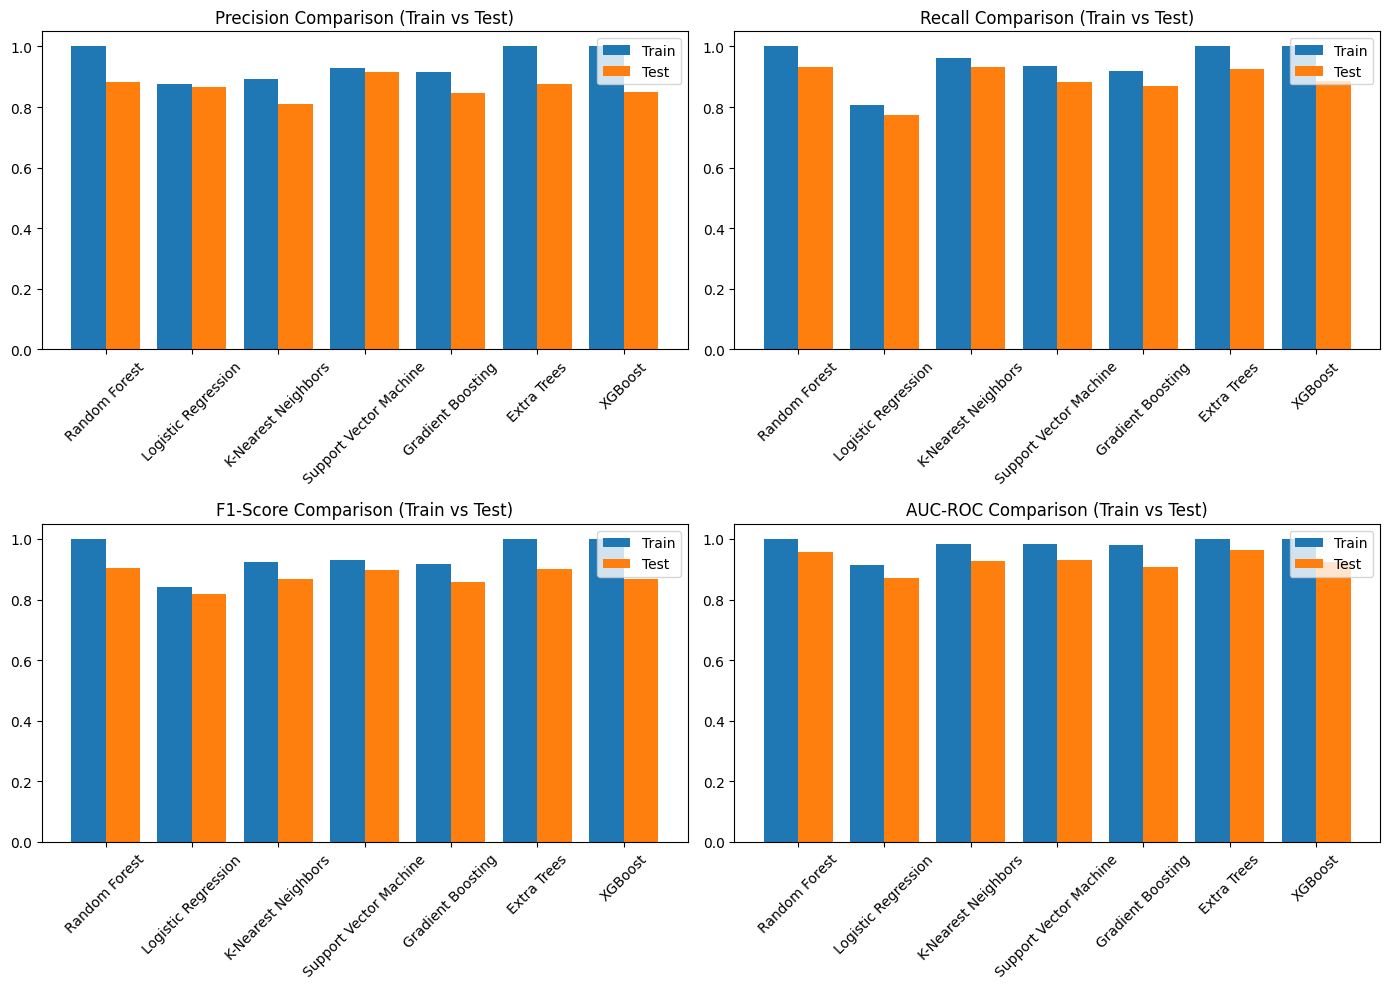

In [304]:

# Step 1: Extracting the evaluation results for plotting

metrics = ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
train_metrics = ['Precision (Train)', 'Recall (Train)', 'F1-Score (Train)', 'AUC-ROC (Train)']
test_metrics = ['Precision (Test)', 'Recall (Test)', 'F1-Score (Test)', 'AUC-ROC (Test)']

# Prepare data for plotting
train_values = {metric: [] for metric in metrics}
test_values = {metric: [] for metric in metrics}

for model_name, model_results in results.items():
    for i, metric in enumerate(metrics):
        train_values[metric].append(model_results[train_metrics[i]])
        test_values[metric].append(model_results[test_metrics[i]])

# Step 2: Plotting the metrics for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define positions for each model bar plot
model_names = list(results.keys())
x = np.arange(len(model_names))

# Plot for Precision
axes[0, 0].bar(x - 0.2, [train_values['Precision'][i] for i in range(len(model_names))], 0.4, label='Train')
axes[0, 0].bar(x + 0.2, [test_values['Precision'][i] for i in range(len(model_names))], 0.4, label='Test')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(model_names, rotation=45)
axes[0, 0].set_title('Precision Comparison (Train vs Test)')
axes[0, 0].legend()

# Plot for Recall
axes[0, 1].bar(x - 0.2, [train_values['Recall'][i] for i in range(len(model_names))], 0.4, label='Train')
axes[0, 1].bar(x + 0.2, [test_values['Recall'][i] for i in range(len(model_names))], 0.4, label='Test')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(model_names, rotation=45)
axes[0, 1].set_title('Recall Comparison (Train vs Test)')
axes[0, 1].legend()

# Plot for F1-Score
axes[1, 0].bar(x - 0.2, [train_values['F1-Score'][i] for i in range(len(model_names))], 0.4, label='Train')
axes[1, 0].bar(x + 0.2, [test_values['F1-Score'][i] for i in range(len(model_names))], 0.4, label='Test')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(model_names, rotation=45)
axes[1, 0].set_title('F1-Score Comparison (Train vs Test)')
axes[1, 0].legend()

# Plot for AUC-ROC
axes[1, 1].bar(x - 0.2, [train_values['AUC-ROC'][i] for i in range(len(model_names))], 0.4, label='Train')
axes[1, 1].bar(x + 0.2, [test_values['AUC-ROC'][i] for i in range(len(model_names))], 0.4, label='Test')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(model_names, rotation=45)
axes[1, 1].set_title('AUC-ROC Comparison (Train vs Test)')
axes[1, 1].legend()

# Step 3: Adjust layout
plt.tight_layout()
plt.show()


In [305]:
# Make predictions on the test set
y_pred = model.predict(X_test)  

# Print first 5 predicted values
print("Predicted Labels:", y_pred[:5])


Predicted Labels: [0 1 1 0 0]


In [270]:
# Get predicted probabilities for the test set 
y_prob = model.predict_proba(X_test)[:, 1] 

# Print first 5 predicted probabilities
print("Predicted Probabilities:", y_prob[:5])


Predicted Probabilities: [0.3599992  0.9939912  0.9067495  0.00644276 0.00239184]


In [271]:
import plotly.express as px

# Create confusion matrix as a DataFrame
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['No Fraud', 'Fraud'], columns=['No Fraud', 'Fraud'])

# Plot interactive confusion matrix
fig = px.imshow(cm_df, 
                text_auto=True, 
                color_continuous_scale='Blues', 
                labels=dict(x="Predicted", y="Actual", color="Count"),
                title="Confusion Matrix")
fig.update_xaxes(side="top")
fig.show()


The model's prediction is good for general fraud detection, balancing between false alarms and missed frauds.

High Accuracy (84.7%):

The model correctly classifies the majority of cases, meaning it performs well overall.
Balanced Precision and Recall:

Precision (87.5%): Most predicted fraud cases are truly fraud, reducing unnecessary investigations.
Recall (83.1%): The model identifies a significant majority of actual fraud cases.
F1-Score (~85.2%):

Indicates a balanced performance between precision and recall, which is crucial in fraud detection.
Low False Positives:

Only 19 legitimate cases are flagged as fraud, minimizing unnecessary inconvenience to customers.


Model Accuracy: 0.9000


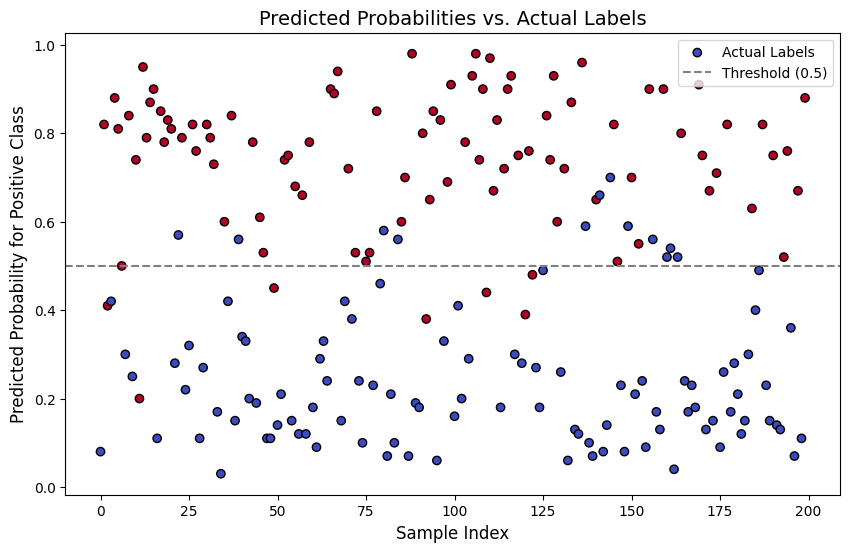

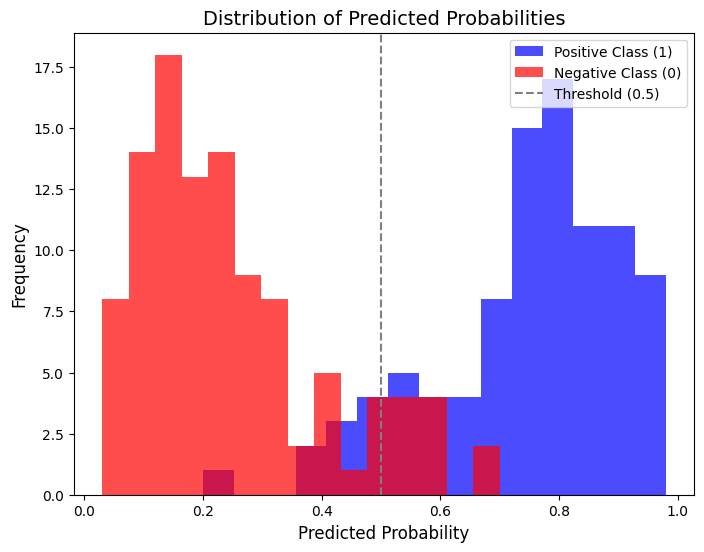

In [273]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample dataset (binary classification)
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities for the test set
predicted_probabilities = model.predict_proba(X_test)
positive_class_probabilities = predicted_probabilities[:, 1]

# Convert probabilities to class predictions based on a threshold (e.g., 0.5)
predicted_classes = (positive_class_probabilities > 0.5).astype(int)

# Evaluate model accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

# Plot predicted probabilities vs. actual labels
plt.figure(figsize=(10, 6))

# Scatter plot of probabilities
plt.scatter(range(len(positive_class_probabilities)), positive_class_probabilities, 
            c=y_test, cmap='coolwarm', label='Actual Labels', edgecolor='k')

# Threshold line
plt.axhline(y=0.5, color='gray', linestyle='--', label='Threshold (0.5)')

# Plot details
plt.title('Predicted Probabilities vs. Actual Labels', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Predicted Probability for Positive Class', fontsize=12)
plt.legend()
plt.show()

# Plot the histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(positive_class_probabilities[y_test == 1], bins=15, alpha=0.7, color='blue', label='Positive Class (1)')
plt.hist(positive_class_probabilities[y_test == 0], bins=15, alpha=0.7, color='red', label='Negative Class (0)')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Threshold (0.5)')

# Plot details
plt.title('Distribution of Predicted Probabilities', fontsize=14)
plt.xlabel('Predicted Probability', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


In [272]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot interactive ROC curve
fig = px.area(
    x=fpr, y=tpr, 
    title=f"ROC Curve (AUC = {roc_auc:.2f})",
    labels={'x': 'False Positive Rate', 'y': 'True Positive Rate'},
    template='plotly_dark'
)
fig.add_scatter(x=[0, 1], y=[0, 1], mode="lines", name="Random", line=dict(dash='dash'))
fig.show()
